In [10]:
import numpy as np
from manim import *
import constant as C

In [96]:
# map = np.empty((C.MAP_HEIGHT, C.MAP_WIDTH), dtype='U25')
map = np.empty((C.MAP_HEIGHT, C.MAP_WIDTH), dtype='U25')
map[2][3] = "Tom"
map[4][4] = "Lucy"
step = 1
print(map)
max_y, max_x = map.shape

[['' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '']
 ['' '' '' 'Tom' '' '' '' '']
 ['' '' '' '' '' '' '' '']
 ['' '' '' '' 'Lucy' '' '' '']]


In [97]:
def get_indices(max_index:int, step:float) :
    if (max_index % 2 == 1) : # odd
        return np.arange(np.ceil(-max_index/2), np.floor(max_index/2) + 1, step = 1) * step
    return np.arange(np.ceil(-max_index/2) + 0.5, np.floor(max_index/2) + 0.5, step = 1) * step

def mobject_ndarray(array:np.array, step:float, color:str, font_size:int) -> VGroup :
    if (array.ndim == 1) :
        array = np.expand_dims(array, 0)

    matrix = Rectangle(height=array.shape[0]*step, width=array.shape[1]*step, grid_xstep=step, grid_ystep=step)
    mobject = VGroup(matrix)
    for i, row in enumerate(get_indices(array.shape[0], step)) :
        for j, col in enumerate(get_indices(array.shape[1], step)) :
            text = Text(f"{array[i][j]}", font_size=font_size).move_to(matrix).shift([col, row, 0])
            mobject.add(text)
    return mobject

[10/13/23 04:00:36] INFO                                                                   ]8;id=931838;file://c:\Users\bowen\OneDrive\Desktop\Coding\lost-simulation\.venv\Lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=444403;file://c:\Users\bowen\OneDrive\Desktop\Coding\lost-simulation\.venv\Lib\site-packages\manim\scene\scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             'C:\Users\bowen\OneDrive\Desktop\Coding\lost-simulation\media                         
                             \images\lost-simulation\Map_ManimCE_v0.17.3.png'                                      
                                                                                                                   

                    INFO     Rendered Map                                                              ]8;id=405272;file://c:\Users\bowen\OneDrive\Desktop\Coding\lost-simulation\.venv\Lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=245028;file://c:\Users\bowen\OneDrive\Desktop\Coding\lost-simulation\.venv\Lib\site-packages\manim\scene\scene.py#241\241]8;;\
                             Played 0 animations                                                                   

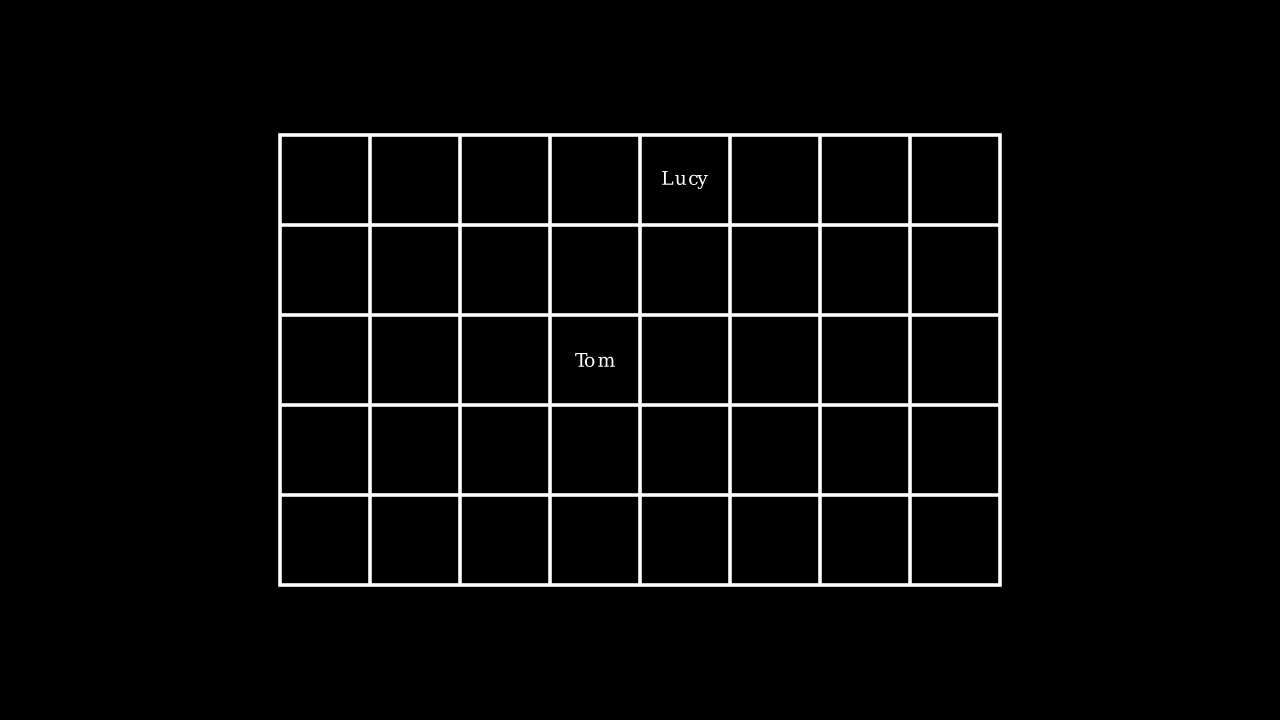

In [98]:
%%manim -qm Map

class Map(Scene) :
    def construct(self) :
        mmap = mobject_ndarray(map, step, BLUE, 15)
        self.add(mmap)
